# OLLA Pseudo-code

Here is the way I want to structure OLLA. 

In [1]:
# Import obligatory packages.

import numpy as np
import matplotlib.pyplot as plt 
import xarray as xr
import glob

from getStats import getStats
from getForcingFunctions import getForcingNetCDF
from getOLLA import getOLLA

In [2]:
# Import files into current terminal.

PATH="/data/keeling/a/adammb4/SGP_proj_2021/DATA/"
precip_data=glob.glob(PATH+"SGP_precip*")
rad_data = glob.glob(PATH+"SGP_Best*")

precip_data_var = "precip"
rad_data_var = "BestEstimate_down_short_hemisp"

#hum_data = glob.glob(PATH+"entirely different.nc")
#temp_data = glob.glob(PATH+"sheik.nc")

#ds1 = xr.open_dataset(rad_data[0])
ds2 = xr.open_dataset(precip_data[3])

#rad = ds1["BestEstimate_down_short_hemisp"].values
#prec = ds2["precip"].values
#precsplit = np.split(prec, 92)

#fig, ax = plt.subplots(1, figsize=(14,10))

#ax.plot(precsplit[35])
#ax.set_ylim((-100,100))

In [3]:
# Send files to statistics program to generate relevant statistical quantities.

# Data variable names are "precip" and "BestEstimate_down_short_hemisp" for precipitation and radiation, respectively.
# This has been updated IN getStats.py. 

threshold = 0

stats_array = getStats(rad_data, rad_data_var, precip_data, precip_data_var, threshold)

stats_array

array([3.44132341e+02, 1.29007507e+03, 2.78236452e+02, 1.48781738e+02,
       2.29757000e+02, 3.19076177e-02, 2.79184049e-01])

In [4]:
## Pass resulting statistical quantities to a program that returns a red forcing .nc that is calibrated to said 
# statistical quantities; also pass the filename for ease of reference in next step

tot_years = 2
filename = "SGP_synth_20sum"

getForcingNetCDF(tot_years, stats_array, PATH+filename+".nc")

# THIS IS SAVED TO PATH ABOVE NOT TO LOCAL DIRECTORY

196.91134720085256


In [5]:
# Import .nc as forcing

forcing = glob.glob(PATH+filename+".nc")

#ds = xr.open_dataset(forcing[0])
#forcing4 = ds["F_solar"].values
#plt.plot(forcing4[:,0])
#plt.xlim(0,1440*2)

In [6]:
# Send forcing information to OLLA

# Might need for loop situation here, but basic idea is 

temp_array, mois_array = getOLLA(forcing)

Text(0.5, 0, 'Minute')

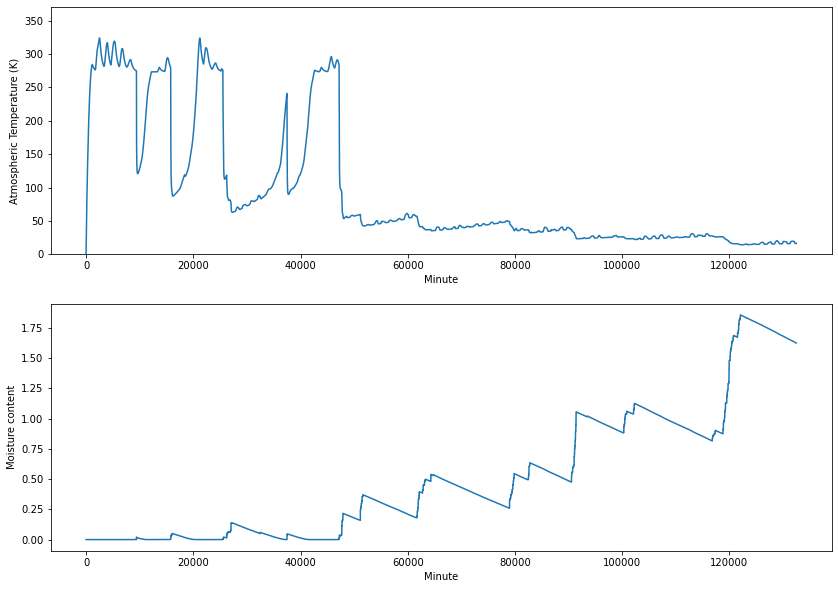

In [7]:
# Print & plot the results from OLLA

# Generic plotting business

fig, ax = plt.subplots(2, figsize=(14,10))

ax[0].plot(temp_array[:,0])
ax[0].set_ylim((0, 370))
ax[0].set_ylabel(r"Atmospheric Temperature (K)")
ax[0].set_xlabel(r"Minute")

ax[1].plot(mois_array[:,0])
ax[1].set_ylabel(r"Moisture content")
ax[1].set_xlabel(r"Minute")
#ax[1].set_ylim((0,10**(-4)))